# Connect to the API / Nos conectamos al API

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
keyapi = os.environ.get('coinmarket_API')
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': keyapi,
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-04-11T13:05:23.076Z', 'error_code': 0, 'error_message': None, 'elapsed': 13, 'credit_count': 1, 'notice': None, 'total_count': 9146}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10153, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

# Normalize it / Normalicemos los datos

In [3]:
type(data)

dict

In [4]:
import pandas as pd

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [5]:
#Json Normalizer, it will make it look as a DataFrame

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\lauta\AppData\Local\Temp\ipykernel_21788\2414848424.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10153,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.934319e+07,1.934319e+07,False,NaN,1,None,None,None,2023-04-11T13:03:00.000Z,30121.216093,2.451451e+10,93.9572,0.160873,6.463636,6.586662,46.678023,38.440436,72.842003,5.826405e+11,47.0737,6.325455e+11,None,2023-04-11T13:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 13:05:38.706549
1,1027,Ethereum,ETH,ethereum,6718,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204578e+08,1.204578e+08,False,NaN,2,None,None,None,2023-04-11T13:03:00.000Z,1916.171512,1.005688e+10,62.9600,0.005670,3.273321,2.521227,30.439863,24.667668,43.699960,2.308178e+11,18.6495,2.308178e+11,None,2023-04-11T13:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 13:05:38.706549
2,825,Tether,USDT,tether,51047,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.035159e+10,8.309174e+10,False,NaN,3,None,None,None,2023-04-11T13:03:00.000Z,1.000879,3.508578e+10,76.1093,0.020248,0.049129,0.062076,-0.676307,0.063624,0.087066,8.042224e+10,6.4979,8.316479e+10,None,2023-04-11T13:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-11 13:05:38.706549
3,1839,BNB,BNB,bnb,1255,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578862e+08,1.578862e+08,False,NaN,4,None,None,None,2023-04-11T13:03:00.000Z,329.205262,8.934309e+08,91.8104,-0.144251,5.400987,5.710373,18.769989,7.698808,18.494244,5.197698e+10,4.2009,5.197698e+10,None,2023-04-11T13:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 13:05:38.706549
4,3408,USD Coin,USDC,usd-coin,11677,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.237504e+10,3.237504e+10,False,NaN,5,None,None,None,2023-04-11T13:03:00.000Z,0.999919,4.628878e+09,69.5070,0.008599,0.007187,0.003885,4.409189,-0.000564,-0.007293,3.237240e+10,2.6159,3.237240e+10,None,2023-04-11T13:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-11 13:05:38.706549
5,52,XRP,XRP,xrp,929,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.168847e+10,9.998901e+10,False,NaN,6,None,None,None,2023-04-11T13:03:00.000Z,0.522147,1.213047e+09,77.7964,0.233210,3.406740,4.331816,44.852672,36.211000,43.521300,2.698900e+10,2.1809,5.221474e+10,None,2023-04-11T13:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 13:05:38.706549
6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.476607e+10,3.567775e+10,False,NaN,7,None,None,None,2023-04-11T13:03:00.000Z,0.407674,4.398736e+08,130.1016,-0.108243,5.321601,2.761849,32.431161,13.434271,30.039520,1.417322e+10,1.1452,1.834532e+10,None,2023-04-11T13:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 13:05:38.706549
7,74,Dogecoin,DOGE,dogecoin,681,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.388941e+11,1.388941e+11,False,NaN,8,None,None,None,2023-04-11T13:03:00.000Z,0.085127,5.667677e+08,27.7060,-0.302676,2.736550,-13.886379,28.516767,4.295405,11.248594,1.182370e+10,0.9554,1.182370e+10,None,2023-04-11T13:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 13:05:38.706549
8,3890,Polygon,MATIC,polygon,650,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...

# Automatize the process / Automaticemos el proceso

In [8]:
# let's create a Time Stamp to start the process.

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    keyapi = os.environ.get('coinmarket_API')
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': keyapi,
}

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now', utc=True)
    df
    
    # Guardaremos toda la informacion en un archivo CSV / Let's save this all in a csv file
    
    if not os.path.isfile(r'C:\Users\lauta\OneDrive\Documentos\Anaconda\API.csv'):
        df.to_csv(r'C:\Users\lauta\OneDrive\Documentos\Anaconda\API.csv', header = 'Column_names')
    else:
        df.to_csv(r'C:\Users\lauta\OneDrive\Documentos\Anaconda\API.csv', mode = 'a', header = False)

# Create the loop / Creamos el ciclo 

In [40]:
import os
from time import time
from time import sleep

for i in range(333): #333 imports es el maximo de interacciones diaria permitidos por el API
    api_runner()
    print("API Runner completed")
    sleep(3600) # Esperara 60 segundos para seguir
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [9]:
df13 = pd.read_csv(r'C:\Users\lauta\OneDrive\Documentos\Anaconda\API.csv')
df13

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10142,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.933806e+07,1.933806e+07,NaN,1,NaN,NaN,NaN,2023-04-05T21:13:00.000Z,28185.794904,1.700684e+10,3.9927,-0.104124,-0.182545,-0.630816,25.976776,20.309526,67.144664,5.450585e+11,45.6738,5.919017e+11,NaN,2023-04-05T21:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-05 21:15:49.938789+00:00
1,1,1027,Ethereum,ETH,ethereum,6698,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204578e+08,1.204578e+08,NaN,2,NaN,NaN,NaN,2023-04-05T21:13:00.000Z,1907.821532,1.039353e+10,-3.3741,-0.074517,1.631404,5.934509,22.103011,13.597616,52.209972,2.298119e+11,19.2641,2.298119e+11,NaN,2023-04-05T21:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-05 21:15:49.938789+00:00
2,2,825,Tether,USDT,tether,50754,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.000456e+10,8.309174e+10,NaN,3,NaN,NaN,NaN,2023-04-05T21:13:00.000Z,1.000147,2.941515e+10,-3.0338,0.029649,-0.007225,0.018115,0.012859,0.005396,0.036348,8.001634e+10,6.7074,8.310396e+10,NaN,2023-04-05T21:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-05 21:15:49.938789+00:00
3,3,1839,BNB,BNB,bnb,1242,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.578874e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-04-05T21:13:00.000Z,314.301589,5.957106e+08,-3.9968,0.174967,0.905629,-0.328989,9.424487,-4.777099,21.900273,4.962427e+10,4.1583,5.028196e+10,NaN,2023-04-05T21:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-05 21:15:49.938789+00:00
4,4,3408,USD Coin,USDC,usd-coin,11429,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.261982e+10,3.261982e+10,NaN,5,NaN,NaN,NaN,2023-04-05T21:13:00.000Z,0.999872,4.198055e+09,-0.5524,0.029272,0.015351,0.022055,-0.006415,-0.020049,-0.022855,3.261564e+10,2.7330,3.261564e+10,NaN,2023-04-05T21:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-05 21:15:49.938789+00:00
5,5,52,XRP,XRP,xrp,927,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.164939e+10,9.998904e+10,NaN,6,NaN,NaN,NaN,2023-04-05T21:13:00.000Z,0.504878,1.402396e+09,7.9708,-0.585810,-0.472967,-7.882951,35.787372,21.466763,47.700000,2.607665e+10,2.1851,5.048781e+10,NaN,2023-04-05T21:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-05 21:15:49.938789+00:00
6,6,2010,Cardano,ADA,cardano,761,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.475450e+10,3.564336e+10,NaN,7,NaN,NaN,NaN,2023-04-05T21:13:00.000Z,0.392560,3.076226e+08,-24.9819,-0.203216,-0.069564,1.980368,18.711241,-2.787751,45.404949,1.364324e+10,1.1436,1.766522e+10,NaN,2023-04-05T21:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-05 21:15:49.938789+00:00
7,7,74,Dogecoin,DOGE,dogecoin,680,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.388175e+11,1.388175e+11,NaN,8,NaN,NaN,NaN,2023-04-05T21:13:00.000Z,0.092952,1.623448e+09,-52.0644,-0.394728,-5.357653,22.451553,24.900443,-4.627493,28.037380,1.290339e+10,1.0815,1.290339e+10,NaN,2023-04-05T21:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-05 21:15:49.938789+00:00
8,8,3890,Polygon,MATIC,polygon,648,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",1.000000

In [10]:
df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h',
                                'quote.USD.percent_change_7d','quote.USD.percent_change_30d']].mean().rename(columns={ 
    'quote.USD.percent_change_1h': 'Cambio porcentual 1h', 
    'quote.USD.percent_change_24h': 'Cambio porcentual 24h', 
    'quote.USD.percent_change_7d': 'Cambio porcentual 7d', 
    'quote.USD.percent_change_30d': 'Cambio porcentual 30d'
})

,Cambio porcentual 1h,Cambio porcentual 24h,Cambio porcentual 7d,Cambio porcentual 30d
name,,,,
Bitcoin,0.160873,6.463636,6.586662,46.678023
Ethereum,0.005670,3.273321,2.521227,30.439863
Tether,0.020248,0.049129,0.062076,-0.676307
BNB,-0.144251,5.400987,5.710373,18.769989
USD Coin,0.008599,0.007187,0.003885,4.409189
XRP,0.233210,3.406740,4.331816,44.852672
Cardano,-0.108243,5.321601,2.761849,32.431161
Dogecoin,-0.302676,2.736550,-13.886379,28.516767
Polygon,-0.197131,2.414166,0.039986,4.965413


In [77]:
#df_melted = df.melt(id_vars='name', value_vars=['quote.USD.volume_change_24h', 'quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d'], var_name='Tipo de cambio', value_name='Valor')
#df_melted

In [11]:
df_stacked = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d']].mean().stack().reset_index()
df_stacked
#Este metodo lo formateo mejor.

,name,level_1,0
0,Bitcoin,quote.USD.percent_change_1h,0.160873
1,Bitcoin,quote.USD.percent_change_24h,6.463636
2,Bitcoin,quote.USD.percent_change_7d,6.586662
3,Bitcoin,quote.USD.percent_change_30d,46.678023
4,Ethereum,quote.USD.percent_change_1h,0.005670
5,Ethereum,quote.USD.percent_change_24h,3.273321
6,Ethereum,quote.USD.percent_change_7d,2.521227
7,Ethereum,quote.USD.percent_change_30d,30.439863
8,Tether,quote.USD.percent_change_1h,0.020248
9,Tether,quote.USD.percent_change_24h,0.049129


In [12]:
df_stacked = df_stacked.rename(columns={
    'level_1': 'Percent_Change',
    0: 'Value'
})
df_stacked

,name,Percent_Change,Value
0,Bitcoin,quote.USD.percent_change_1h,0.160873
1,Bitcoin,quote.USD.percent_change_24h,6.463636
2,Bitcoin,quote.USD.percent_change_7d,6.586662
3,Bitcoin,quote.USD.percent_change_30d,46.678023
4,Ethereum,quote.USD.percent_change_1h,0.005670
5,Ethereum,quote.USD.percent_change_24h,3.273321
6,Ethereum,quote.USD.percent_change_7d,2.521227
7,Ethereum,quote.USD.percent_change_30d,30.439863
8,Tether,quote.USD.percent_change_1h,0.020248
9,Tether,quote.USD.percent_change_24h,0.049129


In [13]:
df_stacked['Percent_Change'] = df_stacked['Percent_Change'].replace(['quote.USD.percent_change_1h', 
                                                                     'quote.USD.percent_change_24h', 
                                                                     'quote.USD.percent_change_7d',
                                                                    'quote.USD.percent_change_30d'],
                                                                    ['1h', '24h','7d','30d'])

df_stacked

,name,Percent_Change,Value
0,Bitcoin,1h,0.160873
1,Bitcoin,24h,6.463636
2,Bitcoin,7d,6.586662
3,Bitcoin,30d,46.678023
4,Ethereum,1h,0.005670
5,Ethereum,24h,3.273321
6,Ethereum,7d,2.521227
7,Ethereum,30d,30.439863
8,Tether,1h,0.020248
9,Tether,24h,0.049129


# Let's visualize the data / Visualicemos los datos

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

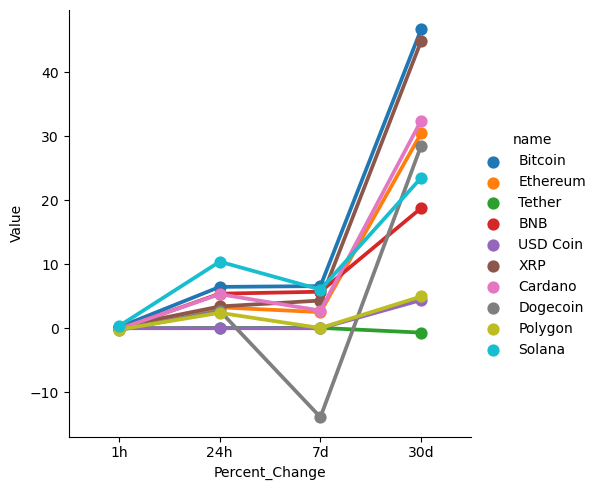

In [15]:
sns.catplot(x = 'Percent_Change', y = 'Value', hue='name', data = df_stacked, kind = 'point')

In [94]:
#Grafiquemos 1 sola Cripto / Let's visualice only 1 Crypto.

In [16]:
eth = df13[['name','quote.USD.price','timestamp']]
eth = eth.query("name == 'Ethereum'")
eth

,name,quote.USD.price,timestamp
1,Ethereum,1907.821532,2023-04-05 21:15:49.938789+00:00
11,Ethereum,1908.172903,2023-04-05 21:16:50.267779+00:00
21,Ethereum,1908.354313,2023-04-05 21:17:50.630325+00:00
31,Ethereum,1908.483987,2023-04-05 21:18:51.255463+00:00
41,Ethereum,1908.298952,2023-04-05 21:19:51.592750+00:00
51,Ethereum,1908.157867,2023-04-05 21:20:51.975267+00:00


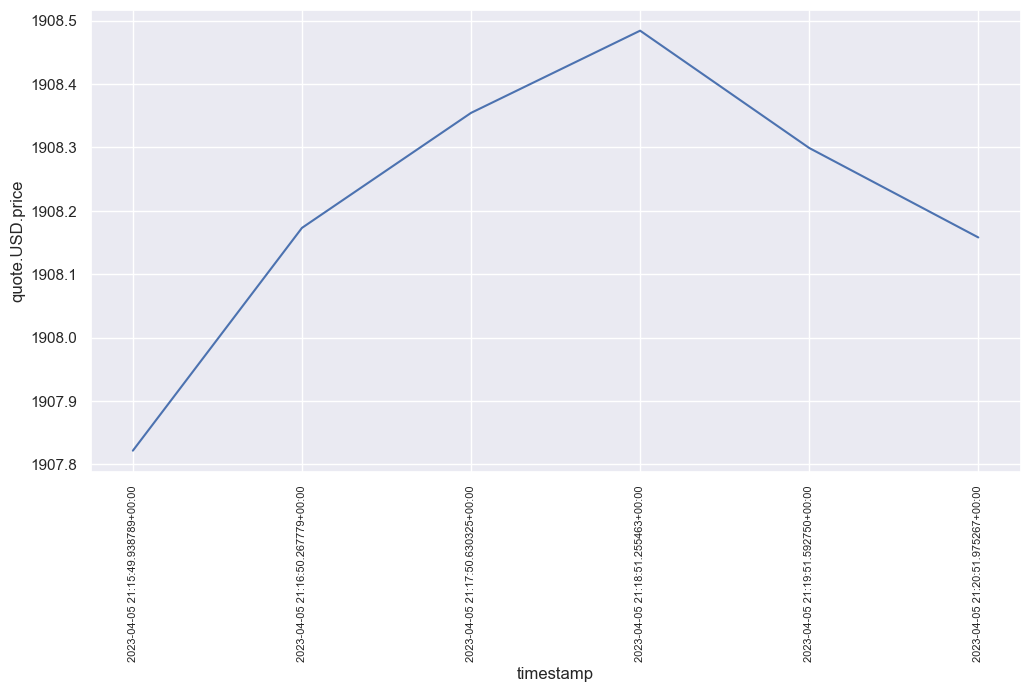

In [24]:
sns.set_theme(style='darkgrid')

fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(x='timestamp', y='quote.USD.price', data=eth, ax=ax)

ax.set_xticks(range(len(eth['timestamp'])))
ax.set_xticklabels(eth['timestamp'], rotation=90, fontsize=8)

plt.show()
